<a href="https://colab.research.google.com/github/ManalSahafi/master-degree/blob/main/Neural%20networks/Classification_Semeion_Handwritten_Digits_using_RBF_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sklearn
import pandas as pd
import numpy as np
from IPython.display import Image
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/semeion/semeion.data", delimiter = r"\s+",
                header=None )
df.head()

,0,1,2,3,4,5,6,7,8,9,...,256,257,258,259,260,261,262,263,264,265
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1,0,0,0,0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1,0,0,0,0,0,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1,0,0,0,0,0,0,0,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
X = pd.DataFrame(df)
X = X.drop([256,257,258,259,260,261,262,263,264,265], axis=1)
X

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1588,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1589,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
1590,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1591,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
label_df = pd.DataFrame(df.iloc[:,[256,257,258,259,260,261,262,263,264,265]])
label_df.rename(columns={256:0, 257:1, 258:2, 259:3, 260:4, 261:5, 262:6, 263:7, 264:8, 265:9 }, inplace=True)

In [ ]:
label_df['y'] = label_df.apply(lambda x: label_df.columns[x.argmax()], axis = 1)
label_df.tail()

,0,1,2,3,4,5,6,7,8,9,y
1588,0,0,0,0,0,0,0,0,0,1,9
1589,0,0,0,0,0,0,0,0,0,1,9
1590,0,0,0,0,0,0,0,0,0,1,9
1591,0,0,0,0,0,0,0,0,0,1,9
1592,0,0,0,0,0,0,0,0,0,1,9


In [ ]:
y = label_df['y']
y

0       0
1       0
2       0
3       0
4       0
       ..
1588    9
1589    9
1590    9
1591    9
1592    9
Name: y, Length: 1593, dtype: int64

In [ ]:
type(y)

pandas.core.series.Series

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=5)

# RBF classifier

In [ ]:
# Evaluate the performance of the model for 1 Epoch
clf = SVC(max_iter = 700, gamma= 0.005, kernel='rbf')
clf = SVC(max_iter = 10, gamma= 0.001, kernel='rbf')
clf = SVC(max_iter = 500 , gamma= 0.001, kernel='rbf')

y_train_pred = cross_val_predict(clf, X_train, y_train, cv=3)

clf.fit(X_train, y_train)

SVC(gamma=0.001, max_iter=500)

In [ ]:
cross_val_score(clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.88712871, 0.86309524, 0.88293651])

In [ ]:
#predicted values in the train set such that the model has never seen the data before
y_train_pred 

array([8, 5, 2, ..., 5, 0, 7], dtype=int64)

In [ ]:
accuracy_score(y_train, y_train_pred)

0.8777263714474554

In [ ]:
y_test_pred = clf.predict(X_test)
y_test_pred

array([0, 9, 2, 1, 6, 3, 3, 8, 7, 6, 4, 2, 4, 6, 3, 7, 2, 8, 1, 5, 0, 8,
       0, 7, 9, 8, 5, 8, 4, 3, 2, 0, 4, 1, 7, 2, 7, 7, 1, 3, 7, 3, 5, 5,
       1, 5, 6, 4, 1, 6, 7, 8, 9, 5, 5, 0, 3, 7, 6, 2, 2, 4, 1, 0, 3, 9,
       9, 7, 7, 0, 0, 3, 1, 7, 3, 1, 9, 5, 4, 8], dtype=int64)

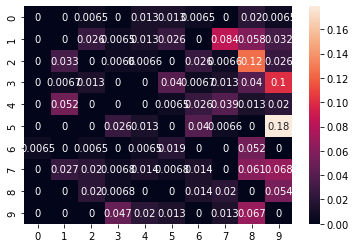

In [ ]:
#Plot Error matrix to see the misclassifications
row_sums = confusionMatrix.sum(axis=1, keepdims=True)
norm_conf_mx = confusionMatrix / row_sums
np.fill_diagonal(norm_conf_mx, 0)
ax = sns.heatmap(norm_conf_mx,annot=True)

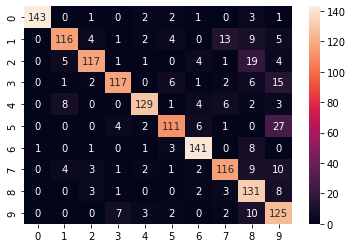

In [ ]:
ax = sns.heatmap(confusionMatrix,annot=True,fmt='d')

In [ ]:
accuracy_score(y_test, y_test_pred)

0.9